Preguntas teóricas

• ¿Qué es un paradigma de programación?
Un paradigma de programación es una estrategia o estilo que define cómo organizar y escribir código para abordar problemas de manera estructurada. Algunos paradigmas populares incluyen el imperativo, donde se detallan los pasos para modificar el estado del programa, y el declarativo, que se enfoca en describir el objetivo final sin especificar los pasos exactos. Dentro del paradigma imperativo están la programación orientada a objetos y la procedimental, mientras que en el declarativo se encuentran la programación funcional y la lógica.

• ¿En qué se basa la programación orientada a objetos?
La programación orientada a objetos (OOP) es una técnica que organiza el código alrededor de objetos que contienen tanto datos como funciones para manipular esos datos. Los objetos se crean a partir de clases, que actúan como modelos. OOP permite dividir un programa en módulos independientes, lo que facilita el mantenimiento y la reutilización del código. Su principal ventaja es que modela el mundo real de manera clara y ordenada, permitiendo crear programas complejos de forma más manejable.

• ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación
big 𝑂?
La recursividad es una técnica donde una función se invoca a sí misma para descomponer un problema en instancias más pequeñas hasta que se alcanza un caso base, mientras que la iteración usa estructuras de control como bucles para repetir una operación hasta que se cumpla una condición. En términos de eficiencia (notación Big O), la recursividad puede ser costosa en términos de tiempo y espacio si no se optimiza, alcanzando complejidades como O(2  ), mientras que la iteración suele ser más eficiente, con una complejidad lineal O(n), que se ajusta mejor a problemas más simples.

• explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)
Un algoritmo con complejidad O(1) tiene un tiempo de ejecución constante, es decir, no depende del tamaño de la entrada, mientras que un algoritmo de O(n) escala su tiempo de ejecución de manera proporcional al tamaño de los datos de entrada. Esto significa que O(1) es mucho más rápido, ya que su tiempo de ejecución permanece estable, mientras que O(n) se vuelve más lento a medida que crece la cantidad de datos.

• ¿Cómo se calcula el orden en un programa que funciona por etapas?
Para calcular la complejidad de un programa se utiliza la notación Big O, que mide cómo crece el tiempo o espacio requerido por un algoritmo a medida que aumenta el tamaño del input. Esta notación se enfoca en el término de mayor crecimiento, ignorando constantes y factores de menor importancia. Si el programa tiene múltiples partes con diferentes complejidades, la complejidad global será dominada por la parte más costosa en términos de Big O.


• ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
Para determinar la complejidad temporal de un algoritmo recursivo, se puede formular una relación de recurrencia que describe cómo el tamaño del problema se reduce en cada llamada recursiva. Esta relación se resuelve usando herramientas como el teorema maestro, que nos permite calcular la complejidad final. La profundidad de la recursión y la cantidad de trabajo realizado en cada nivel determinan la complejidad global del algoritmo, que podría variar desde O(n) hasta O(nlogn) o más, dependiendo del patrón de recursión.

Código

In [19]:
import time
import matplotlib.pyplot as plt
from functools import wraps

class CaminoPCB:
    def __init__(self, N, M):
        self.N = N  # Número de filas
        self.M = M  # Número de columnas

    # Decorador para medir el tiempo de ejecución
    def tiempo_ejecucion(func):
        @wraps(func)
        def decorador(*args, **kwargs):
            inicio = time.time()
            resultado = func(*args, **kwargs)  
            fin = time.time()
            duracion = fin - inicio  # Calcula el tiempo de ejecución
            print(f"{func.__name__} se ejecutó en: {duracion:.5f} segundos")
            return resultado, duracion 
        return decorador

    # Solución recursiva
    @tiempo_ejecucion
    def caminos_recursivos(self, fila, columna):
        if fila == self.N - 1 and columna == self.M - 1:
            return 1  # Si llegamos a B
        if fila >= self.N or columna >= self.M:
            return 0  
        # Avanzar hacia abajo o hacia la derecha
        return self.caminos_recursivos(fila + 1, columna)[0] + self.caminos_recursivos(fila, columna + 1)[0]

    # Solución iterativa 
    @tiempo_ejecucion
    def contar_caminos_iterativo(self):
        nodos = [(0, 0)]  
        count = 0

        while len(nodos) > 0:
            x, y = nodos.pop()
            if x == self.N - 1 and y == self.M - 1:  # Si llegamos a la esquina inferior derecha
                count += 1
                continue

            # Moverse a la derecha si es posible
            if y + 1 < self.M:
                nodos.append((x, y + 1))

            # Moverse hacia abajo si es posible
            if x + 1 < self.N:
                nodos.append((x + 1, y))

        return count

In [21]:
pcb = CaminoPCB(6, 6)  # Ejemplo

# Calcular caminos usando el método recursivo
resultado_recursivo, _ = pcb.caminos_recursivos(0, 0)

# Calcular caminos usando el método iterativo
resultado_iterativo, _ = pcb.contar_caminos_iterativo()


print(f"Resultado del método recursivo: {resultado_recursivo} caminos en una grilla 6x6.")
print(f"Resultado del método iterativo: {resultado_iterativo} caminos en una grilla 6x6.")

caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00002 segundos
caminos_recursivos se ejecutó en: 0.00005 segundos
caminos_recursivos se ejecutó en: 0.00007 segundos
caminos_recursivos se ejecutó en: 0.00011 segundos
caminos_recursivos se ejecutó en: 0.00316 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00002 segundos
caminos_recursivos se ejecutó en: 0.00004 segundos
caminos_recursivos se ejecutó en: 0.00006 segundos
caminos_recursivos se ejecutó e

contar_caminos_iterativo se ejecutó en: 0.00001 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00005 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00003 segundos
caminos_recursivos se ejecutó en: 0.00011 segundos
contar_caminos_iterativo se ejecutó en: 0.00002 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00008 segundos
caminos_recursivos se ejecutó en: 0.00011 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00008 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos se ejecutó en: 0.00000 segundos
caminos_recursivos 

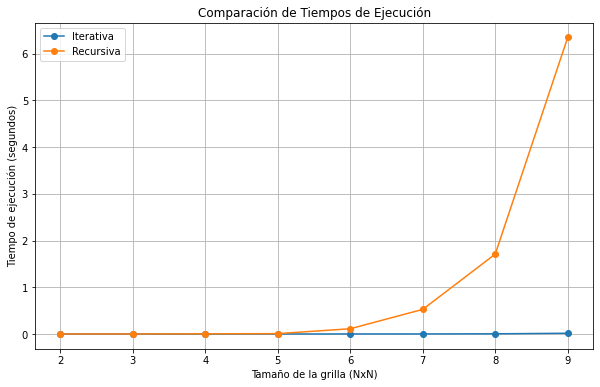

In [22]:
# Gráfico
def generar_grafico():
    tamanos = list(range(2, 10)) 
    tiempos_iterativos = []
    tiempos_recursivos = []

    
    for size in tamanos:
        pcb = CaminoPCB(size, size)
        
        # Medir tiempo para solución iterativa
        _, tiempo_iterativo = pcb.contar_caminos_iterativo()
        tiempos_iterativos.append(tiempo_iterativo)
        
        # Medir tiempo para solución recursiva
        _, tiempo_recursivo = pcb.caminos_recursivos(0, 0)
        tiempos_recursivos.append(tiempo_recursivo)

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(tamanos, tiempos_iterativos, label='Iterativa', marker='o')
    plt.plot(tamanos, tiempos_recursivos, label='Recursiva', marker='o')

    
    plt.title('Comparación de Tiempos de Ejecución')
    plt.xlabel('Tamaño de la grilla (NxN)')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.legend()
    plt.grid(True)
    plt.show()


generar_grafico()